In [12]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor


In [13]:
# Load the dataset from Google Drive
df = pd.read_csv("/content/drive/MyDrive/Project/Predict Student Performance.csv")

# Display the first few rows of the dataset
print(df.head())

   Socioeconomic Score  Study Hours  Sleep Hours  Attendance (%)  Grades
0              0.95822          3.4          8.2            53.0    47.0
1              0.85566          3.2          5.9            55.0    35.0
2              0.68025          3.2          9.3            41.0    32.0
3              0.25936          3.2          8.2            47.0    34.0
4              0.60447          3.8         10.0            75.0    33.0


In [14]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [15]:
# Check if there are any missing values in the entire DataFrame
df.isnull().values.any()

False

In [16]:
# Get the total number of missing values in each column
df.isnull().sum()

,0
Socioeconomic Score,0
Study Hours,0
Sleep Hours,0
Attendance (%),0
Grades,0


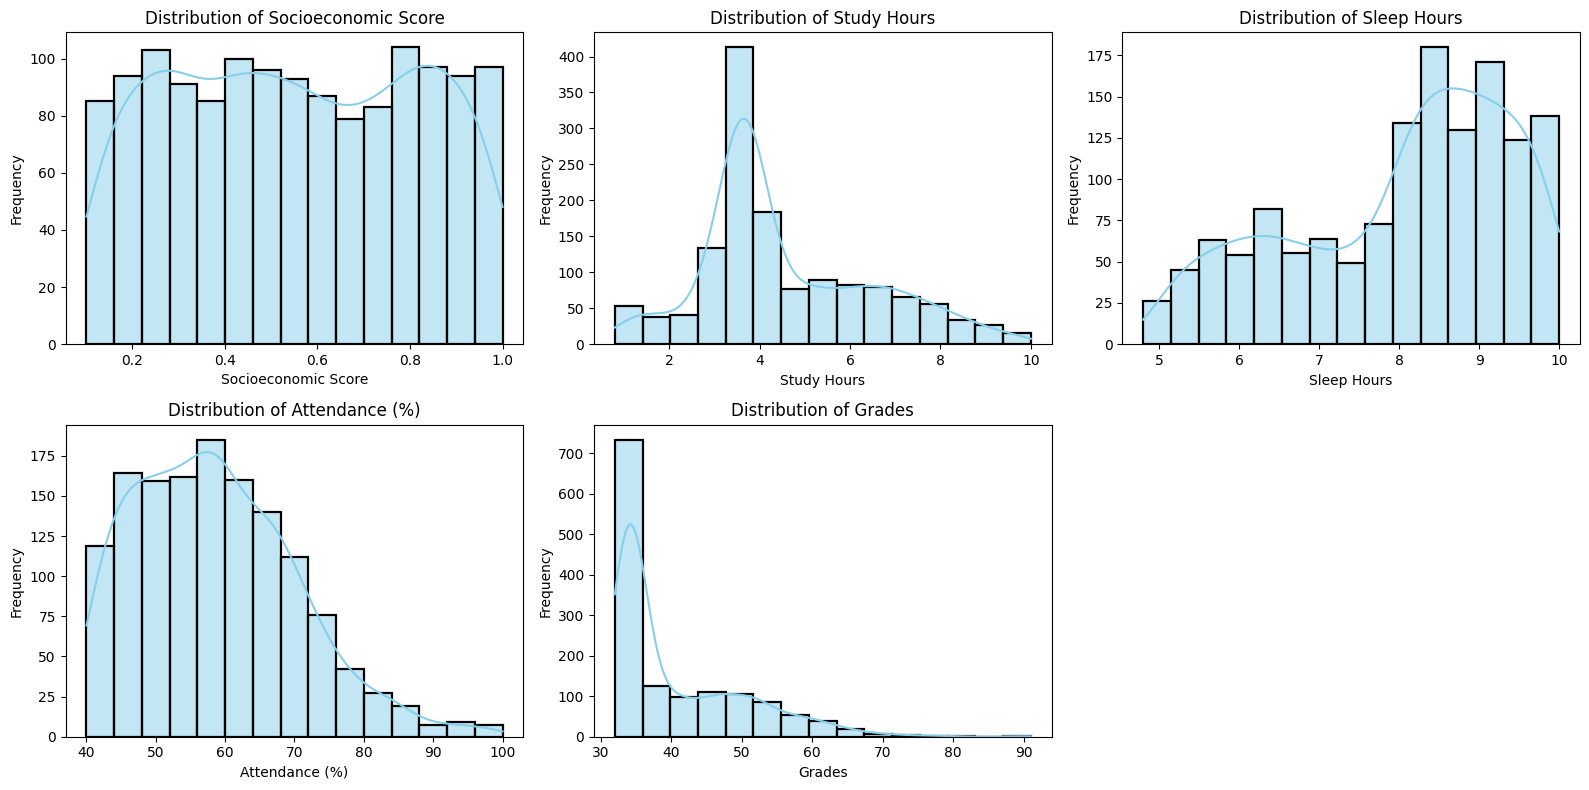

In [17]:
# Set up the visualisation size
plt.figure(figsize=(16, 8))

# Loop through each numerical column to create subplots
for i, column in enumerate(df.columns, 1):

    plt.subplot(2, 3, i) # Adjust number of rows/columns based on the number of columns
    sns.histplot(df[column], kde=True, bins=15, color='skyblue', edgecolor='black', lw=3) # Color for better visibility
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")


# Adjust layout to prevent overlapping subplots
plt.tight_layout()
plt.show()

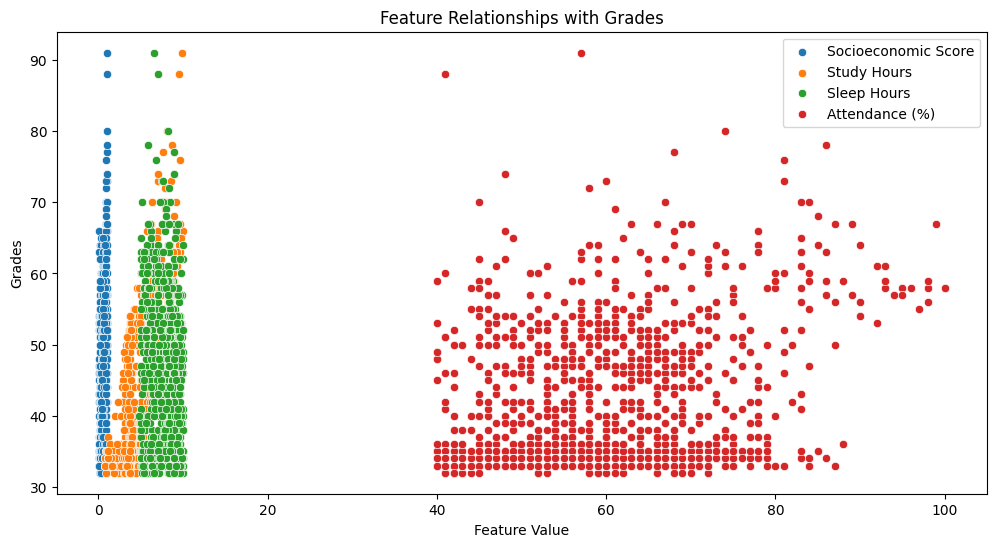

In [18]:
# Analyse relationships between features and the target (Grades)
plt.figure(figsize=(12, 6))
for column in ['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']:
    sns.scatterplot(x=column, y='Grades', data=df, label=column)
plt.legend()
plt.title("Feature Relationships with Grades")
plt.xlabel("Feature Value")
plt.ylabel("Grades")
plt.show()

In [19]:
# Split the data into features (x) and target (y)
x = df.drop("Grades", axis=1)  # Features: all columns except 'Grades'
y = df["Grades"]  # Target: the 'Grades' column

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=8)

# Train the model using Gradient Boosting Regressor
gb = GradientBoostingRegressor()  # Create the model
model = gb.fit(x_train, y_train)  # Train the model with the training data

# Evaluate the model and get the R-squared score
score = model.score(x_test, y_test)  # The R-squared score measures model performance

# Print the score to see the result
print("Gradient Boosting Regressor", score)


Gradient Boosting Regressor 0.9757570390687067


In [20]:
# Create a DataFrame with real grades and predicted grades
vs = pd.DataFrame()
vs["Real_Grades"] = y_test  # Real grades from the test set
vs["Model_Predict"] = model.predict(x_test)  # Predicted grades from the model

# Sample 10 rows for preview
vs_sample = vs.sample(15)

# Display the sample
vs_sample

,Real_Grades,Model_Predict
926,33.0,34.100461
1294,41.0,41.096485
1279,33.0,34.196107
444,37.0,36.183863
408,54.0,53.461624
93,35.0,34.194097
1155,35.0,33.709543
109,34.0,33.732189
1178,33.0,34.413189
908,34.0,34.104168
